In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
columns = ['sepal_length', 'sepal_width', 'class'] #rename the columns
df = pd.read_csv('iris.txt', header = None, names = columns) #read the dataset

In [3]:
df.head() #return head of dataset

,,sepal_length,sepal_width,class
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info() #information of data in the dataset

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 150 entries, (5.1, 3.5) to (5.9, 3.0)
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   class         150 non-null    object 
dtypes: float64(2), object(1)
memory usage: 5.9+ KB


In [5]:
df.describe() #statistics of each column of the dataset

,sepal_length,sepal_width
count,150.000000,150.000000
mean,3.758667,1.198667
std,1.764420,0.763161
min,1.000000,0.100000
25%,1.600000,0.300000
50%,4.350000,1.300000
75%,5.100000,1.800000
max,6.900000,2.500000


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

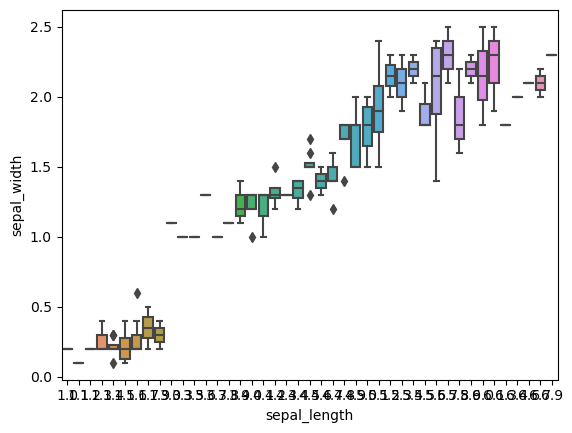

In [6]:
sns.boxplot(x='sepal_length', y='sepal_width', data = df) #compare sepal length and petal widths with a boxplot

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

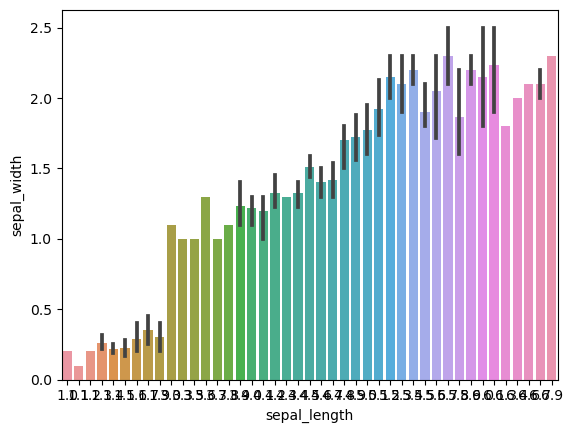

In [7]:
sns.barplot(x='sepal_length', y='sepal_width', data = df) #compare sepal length and petal widths with a barplot

<AxesSubplot:xlabel='sepal_length', ylabel='count'>

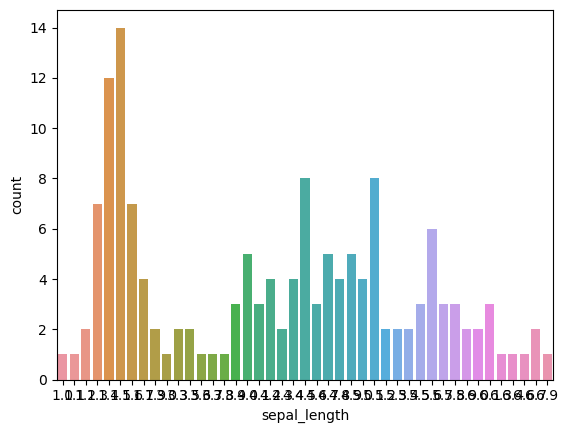

In [8]:
sns.countplot(x = 'sepal_length', data = df) #use a countpot to get number of counts of sepal lengths

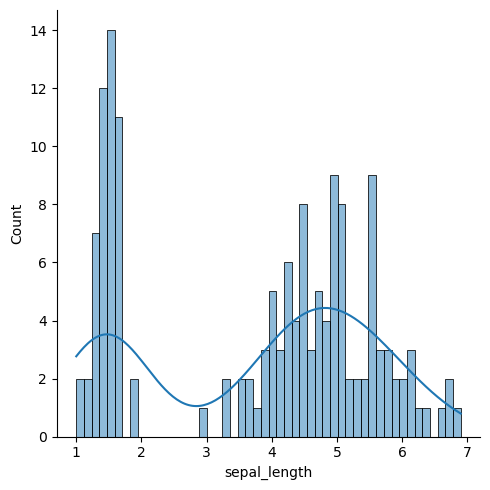

In [9]:
sns.displot(df['sepal_length'], bins=50, kde = True) #plot a histogram of sepal lengths with kernel density estimate

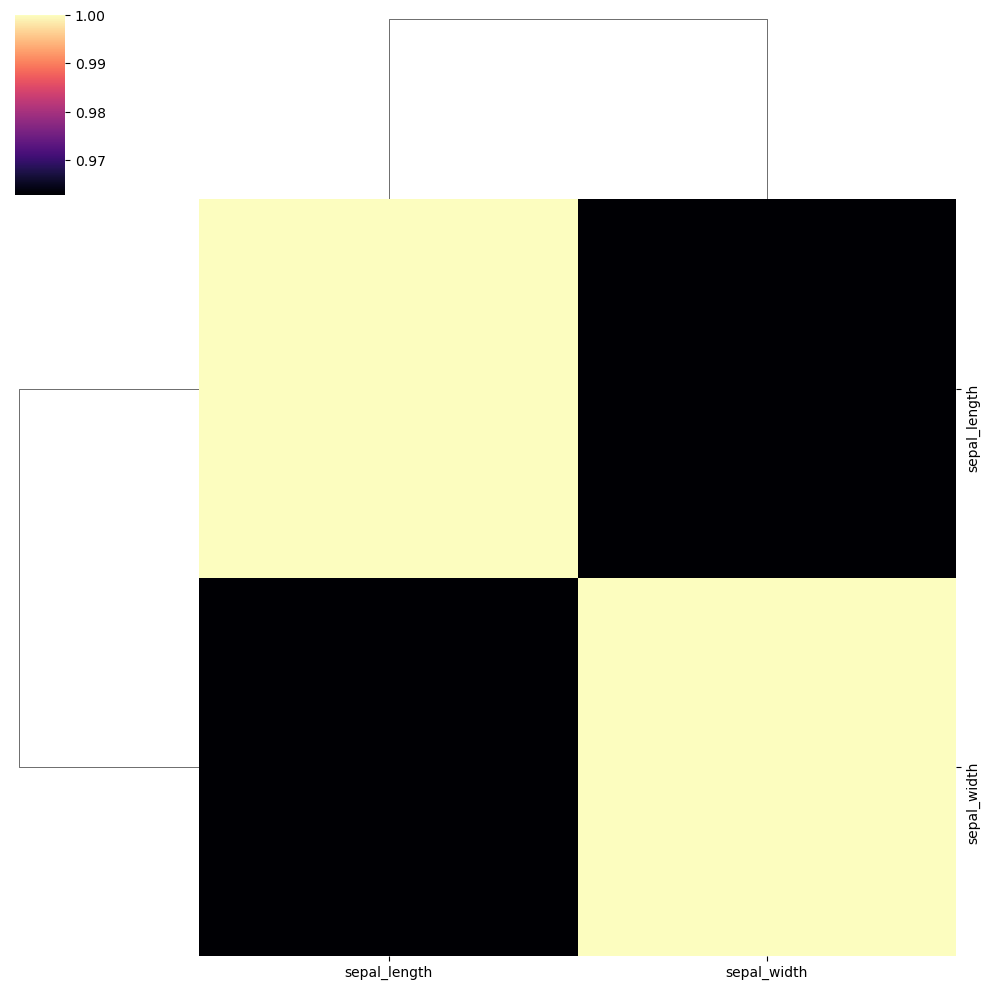

In [10]:
sns.clustermap(df.corr(), cmap = 'magma') #clustermap of the correlations in dataset

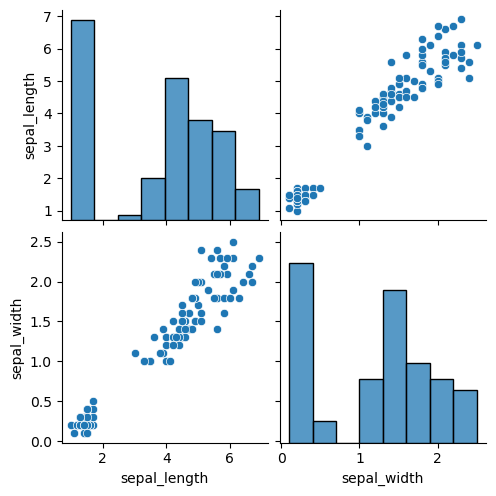

In [11]:
sns.pairplot(data = df.loc[~df.index.duplicated(), :]) #Continuously got “VALUEERROR: CANNOT REINDEX FROM A DUPLICATE AXIS” error
#As a result, dropped rows with duplicated indicies
#https://www.roelpeters.be/solve-pandas-valueerror-cannot-reindex-from-a-duplicate-axis/

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler() #Standardize the scale of the data since data is scale sensitive

In [14]:
scaler.fit(df.drop('class', axis=1)) #drop the "class" column, no numerical data here

StandardScaler()

In [15]:
scaled_features = scaler.transform(df.drop('class', axis=1)) #transform the scaler without dropped column

In [16]:
df_features = pd.DataFrame(scaled_features, columns=df.columns[:-1]) #convert scaled features into a dataframe 

In [17]:
df_features.head() #display head of the new DataFrame

,sepal_length,sepal_width
0,-1.341272,-1.312977
1,-1.341272,-1.312977
2,-1.398138,-1.312977
3,-1.284407,-1.312977
4,-1.341272,-1.312977


# TRAIN TEST SPLIT

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x = df_features #x axis data will be the elements of the new DataFrame
y = df['class'] #y axis data will contain the dropped "class" data

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
...     x, y, test_size=0.30, random_state=42) #initialize training and test data for x and y values, 30% test 70% train

In [21]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [22]:
knn = KNC(n_neighbors = 40) #use 40 n-neighbors for KNN algorithm

In [23]:
knn.fit(X_train, y_train) #fit the training data to the KNN algorithm

KNeighborsClassifier(n_neighbors=40)

In [24]:
predict = knn.predict(X_test) #predict the x testing data with KNN

C:\Users\Avinash Sookram\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [25]:
predict #return the prediction

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
print(confusion_matrix(y_test, predict)) #print the confusion matrix of the y test data and the prediction data

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [28]:
print(classification_report(y_test, predict)) #return the classification report of the y test and prediction data

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [29]:
error_rate = [] #used to hold the error rate

In [30]:
for i in range(1,45): #loop through the error rates of the prediction and append them to the list
    knn = KNC(n_neighbors=i)
    knn.fit(X_train, y_train)
    predict_i = knn.predict(X_test)
    error_rate.append(np.mean(predict_i != y_test))
    

C:\Users\Avinash Sookram\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Avinash Sookram\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

C:\Users\Avinash Sookram\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Avinash Sookram\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

C:\Users\Avinash Sookram\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Avinash Sookram\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

Text(0.5, 1.0, 'Error rate Vc K values of KNN')

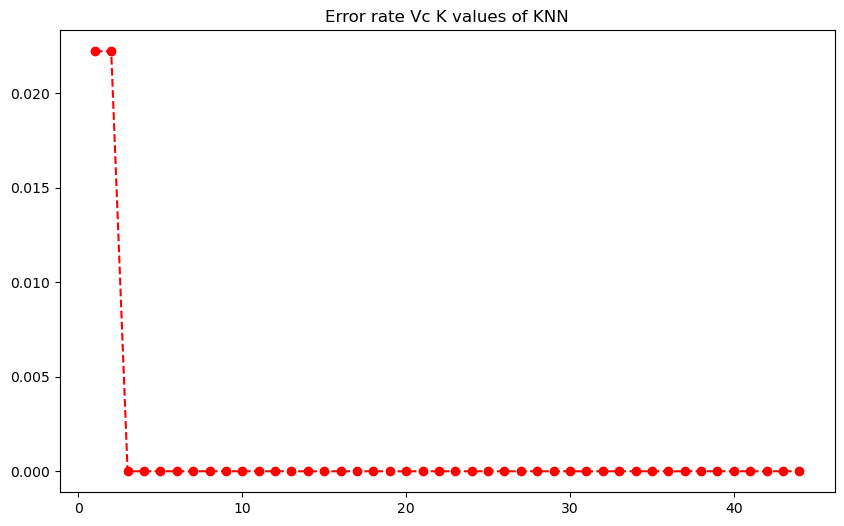

In [31]:
plt.figure(figsize=(10,6)) #plot the error rates 
len(error_rate)
plt.plot(range(1,45), error_rate, color='red', linestyle = 'dashed', marker = 'o')
plt.title("Error rate Vc K values of KNN")